In [22]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast, GPT2Config

import torch
from torch.utils.data import Dataset
from tqdm import tqdm
from pathlib import Path
import numpy as np
from PIL import Image
import os

In [23]:
VOCAB_SIZE = 30000
MAX_LEN = 64

In [24]:
TOKENIZER_SAVEDIR = Path('/home/macosta/ttmp/primus-data/visual-tokens-7/')
LM_MODEL_SAVEDIR = Path('/home/macosta/ttmp/primus-models/gpt2-lm-visual-tokens-7/')
TXT_FILES = Path('/home/macosta/ttmp/primus-data/leipzig-filtered/leipzig-delim-7/')

In [25]:
config = GPT2Config(
    vocab_size=VOCAB_SIZE,
    n_positions=MAX_LEN,
    n_head=12,
)

In [26]:
model = GPT2LMHeadModel(config=config).from_pretrained(str(LM_MODEL_SAVEDIR))

In [27]:
tokenizer = GPT2TokenizerFast.from_pretrained(TOKENIZER_SAVEDIR, max_len=MAX_LEN)

file /home/macosta/ttmp/primus-data/visual-tokens-7/config.json not found
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [28]:
STAFFLINE = "0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000"
STAFFLINES = [STAFFLINE] * 20
STAFFLINES = ' ' + ' '.join(STAFFLINES) + ' '

In [29]:
def tokens_to_img(tokens):
    tokens = [t for t in tokens if t[0] != '<']
    txt = STAFFLINES.join(tokens)
    cols = txt.replace('_', ' ').split(' ')
    arr = [[int(x) for x in col] for col in cols]
    arr = (1 - np.array(arr, dtype=np.uint8)) * 255
    img = Image.fromarray(arr.T)
    return img

In [15]:
# def tokens_to_img(tokens):
#     tokens = [t for t in tokens if t[0] != '<']
#     txt = STAFFLINES.join(tokens)
#     txt = txt.replace(' ', '')
#     cols = [txt[i:i+175] for i in range(0, len(txt), 175)]
#     arr = [[int(x) for x in col] for col in cols]
#     arr = (1 - np.array(arr, dtype=np.uint8)) * 255
#     return Image.fromarray(arr.T)

In [30]:
def generate_image(show=False):
    input_str = torch.tensor([[0]])
    output_tokens = model.generate(input_str, 
                                   pad_token_id=1,
                                   eos_token_id=2,
                                   temperature=1,
                                   max_length=MAX_LEN,
                                   do_sample=True)[0]
    output_tokens = tokenizer.decode(output_tokens).split()
    if output_tokens[0] == '<s>':
        output_tokens = output_tokens[1:]
    img = tokens_to_img(output_tokens)
    if show:
        img.show()
    return img

In [35]:
def generate_images(n, savepath):
    savepath.mkdir(exist_ok=True)
    for i in tqdm(range(n)):
        img = generate_image()
        img.save(savepath / f"generated-columnwise-{i}.png")

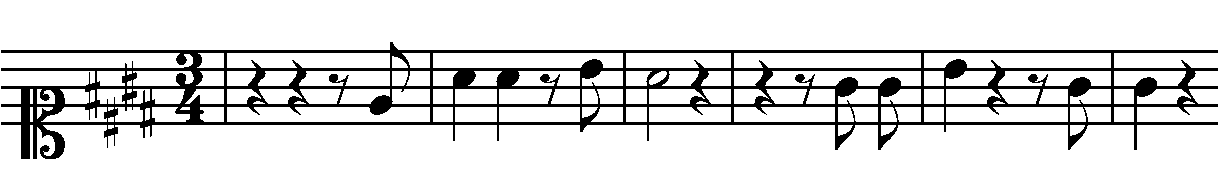

In [33]:
generate_image()

In [36]:
generate_images(30, savepath=Path('/home/macosta/ttmp/generated-visual-tokens/'))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.34it/s]
